Data sample:
   user  gesture  sequence         x         y         z   time
0     1        0         1  0.623219  0.639005 -0.576136    6.0
1     1        0         1  0.619415  0.647361 -0.573931   37.0
2     1        0         1  0.615745  0.648051 -0.571920   67.0
3     1        0         1  0.609227  0.655674 -0.569943  101.0
4     1        0         1  0.606046  0.650463 -0.568197  132.0


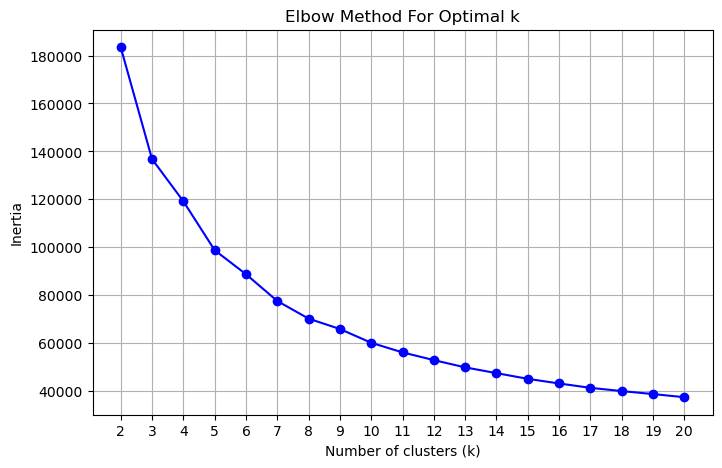


Data sample with cluster assignments (letters):
   user  gesture  sequence         x         y         z   time  \
0     1        0         1  0.623219  0.639005 -0.576136    6.0   
1     1        0         1  0.619415  0.647361 -0.573931   37.0   
2     1        0         1  0.615745  0.648051 -0.571920   67.0   
3     1        0         1  0.609227  0.655674 -0.569943  101.0   
4     1        0         1  0.606046  0.650463 -0.568197  132.0   

   cluster_numeric cluster_letter  
0                8              I  
1                8              I  
2                8              I  
3                8              I  
4                8              I  

Gesture sequences (cluster letters):
Gesture 0: ['I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'G', 'G', 'G', 'G', 'G', 'G', 'G', 'G', 'G', 'G', 'G', 'G', 'G', 'G', 'G', 'G', 'G', 'G', 'G', 'G', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D

In [2]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Load your CSV file. Adjust the file path accordingly.
# We assume here that the file has headers. If not, set header=None and assign column names.
df = pd.read_csv("Standardize.csv")

# For example, we assume the CSV columns are arranged as follows:
# Column 0: x coordinate, Column 1: gesture id (number drawn), Column 2: y coordinate, Column 3: z coordinate.
if len(df.columns) >= 4:
    df.rename(columns={df.columns[1]: 'gesture',
                       df.columns[3]: 'x',
                       df.columns[4]: 'y',
                       df.columns[5]: 'z'}, inplace=True)
else:
    raise ValueError("The CSV file must have at least 4 columns.")

print("Data sample:")
print(df.head())

# Extract the 3D points (x, y, z)
all_points = df[['x', 'y', 'z']].values

# ----------------------
# Elbow Method Plot
# ----------------------
# Define a range of possible k values, e.g., from 2 to 20.
ks = range(2, 21)
inertias = []

# Compute inertia (within-cluster sum-of-squares) for each k.
for k in ks:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(all_points)
    inertias.append(kmeans.inertia_)

# Plot the elbow graph.
plt.figure(figsize=(8, 5))
plt.plot(ks, inertias, 'bo-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal k')
plt.xticks(ks)
plt.grid(True)
plt.show()

# ----------------------
# Clustering with the Chosen k
# ----------------------
# After inspecting the elbow graph, select an optimal k value.
# For demonstration, we'll use k = 10 (adjust based on your elbow plot).
optimal_k = 10
kmeans_optimal = KMeans(n_clusters=optimal_k, random_state=42)
df['cluster_numeric'] = kmeans_optimal.fit_predict(all_points)

# Map numeric labels to letters.
# Note: This maps 0 -> 'A', 1 -> 'B', etc.
# Ensure that optimal_k <= 26 or adjust as needed.
label_to_letter = {i: chr(65 + i) for i in range(optimal_k)}
df['cluster_letter'] = df['cluster_numeric'].map(label_to_letter)

print("\nData sample with cluster assignments (letters):")
print(df.head())

# ----------------------
# Grouping by Gesture
# ----------------------
# Assuming the "gesture" column has the drawn digit (or any identifier for each gesture),
# group the cluster letter sequence by gesture.
gesture_sequences = df.groupby('gesture')['cluster_letter'].apply(list).to_dict()

# Print the sequences for each gesture.
print("\nGesture sequences (cluster letters):")
for gesture_id, sequence in gesture_sequences.items():
    print(f'Gesture {gesture_id}: {sequence}')

print(gesture_sequences[0])


In [12]:
geste_0 = " "
for i in gesture_sequences[0]:
    if i != geste_0[-1]:
        geste_0+= i
geste_0 = geste_0.strip()
print(geste_0)
geste_1 = " " 
for i in gesture_sequences[1]:
    if i != geste_1[-1]:
        geste_1+= i
geste_1 = geste_1.strip()
print(geste_1)
print(len(geste_0),len(geste_1))
geste_liste = []
geste_str = " "
for gesture_id, sequence in gesture_sequences.items():
    for i in sequence:
        if i != geste_str[-1]:
            geste_str+= i
    geste_liste.append([gesture_id,geste_str.strip()])
    geste_str = " "
print(geste_liste)
print(len(geste_liste))
    


IGFACICJIEFACJIBEFACJBEFACJBJEFACJBEFACJBEFACJBEFCJBEFCJBEFCJBEBEFCDBEFCJDBEBJCFGEBEFCDBEBJCFGEBEFCDIEBIEIDEFCDEDCFGEIEFCJDBEBEFACDJDJBEFACDIEDEFACDEFACDBEFACDEFACDJBEFACDBEFACJDBEFACDBEFACDBEBEFDJBEFDBEFDBEFDBEDBEDBEFDBEFDBEDJBEFDJBDFGEIDAFGIDFGIDAFGDAFGIDAFGIDAFGDFGIDAFGDGAFGDAGICAGAGICAGICAGICAGICAGICAGICAGICAGICAGIAGEBJDCFEBDFEBDFEBDFEBDFEBDFEBDFEBDFEBDFEBJDFEIGFADGIGFACDIEGFADIEGFADIEGFADIEGFADIEGFACDIEGFACDIEGFACDIEIEFDIEGFAGIGAGIGAGIGAIGAGIGAIGAGIGAGIGAGIGAGIH
EBDFCEBEDFDCEBEDFACEBEGDFACEGFAEGFAEGFAEIEGFAEIGFAFAEIGAFAEBDCFCEBDCFCEBEDFCEDFCEBEDFCEFAEBEDFCEDFCEDFCGEBEDFAFCEIBIDACEBDFDCEBEDFACEBEDFACEDFAEBEDFCEBEDFACEBEDFACEBEDFCEDFEBDFDCEBEDFDCEBEDFDBEDFDBDFDBDFDBEDFDBDFDCBEDFDBEDFDGIGAGAIGIGAGAIGAIGAIGAIGAIGAGAGIGAGIGAGIGAGIGAGAGAGAGAGAGAEBEDFCEFDEBEDFDEBEDFDEFDEFEDFDEBEDFDEBEDFDEBEDFDEBEDFDCEBEDFDCEBEDFAFACEBEDFCEBEDFAFACEIDFACEIEGDFAFACEBIEDFACEIGDFAFAGEIGDFAFACGIGACGIGACGIGACADCACGIGACGIGACGIGACGIGACADCACGIGACH
471 461
[[0, 'IGFACICJIEFACJIBEFACJBEFACJBJEFACJBEFACJBEFACJBEFCJB

In [13]:
def edit_distance(str3, str4):
    matrice = [[0 for j in range(len(str3) + 1)] for i in range(len(str4) + 1)]
    for j in range(len(str3) + 1):
        matrice[0][j] = j
    for i in range(len(str4) + 1):
        matrice[i][0] = i
    for i in range(1, len(str4) + 1):
        for j in range(1, len(str3) + 1):
            cost = 0 if str3[j - 1] == str4[i - 1] else 1
            matrice[i][j] = min(
                matrice[i - 1][j - 1] + cost,
                matrice[i][j - 1] + 1,
                matrice[i - 1][j] + 1
            )
    return matrice[-1][-1]

liste_iterative = []
for i in geste_liste:
    for j in geste_liste:
        if j != i:
            if j[0] not in liste_iterative:
                print(f"edit distance between {i[0]} {j[0]} = {edit_distance(i[1], j[1])}")
    liste_iterative.append(i[0])

edit distance between 0 1 = 252
edit distance between 0 2 = 293
edit distance between 0 3 = 386
edit distance between 0 4 = 370
edit distance between 0 5 = 358
edit distance between 0 6 = 364
edit distance between 0 7 = 280
edit distance between 0 8 = 380
edit distance between 0 9 = 362
edit distance between 1 2 = 213
edit distance between 1 3 = 335
edit distance between 1 4 = 348
edit distance between 1 5 = 319
edit distance between 1 6 = 361
edit distance between 1 7 = 259
edit distance between 1 8 = 383
edit distance between 1 9 = 365
edit distance between 2 3 = 306
edit distance between 2 4 = 332
edit distance between 2 5 = 301
edit distance between 2 6 = 326
edit distance between 2 7 = 253
edit distance between 2 8 = 369
edit distance between 2 9 = 331
edit distance between 3 4 = 312
edit distance between 3 5 = 297
edit distance between 3 6 = 362
edit distance between 3 7 = 292
edit distance between 3 8 = 352
edit distance between 3 9 = 351
edit distance between 4 5 = 321
edit dis

In [24]:
import numpy as np
from sklearn.metrics import accuracy_score
from collections import defaultdict
from tqdm import tqdm

# Dummy distance function placeholder (e.g. DTW or edit distance between sequences)
def sequence_distance(seq1, seq2):
    # Replace this with your actual distance function
    return np.linalg.norm(seq1 - seq2)

# Prepare sequence data for a single (user, gesture, sequence)
def extract_sequences(df):
    sequences = defaultdict(list)
    for (user, gesture, sequence_id), group in df.groupby(['user', 'gesture', 'sequence']):
        sequence_data = group[['x', 'y', 'z']].to_numpy()
        sequences[(user, gesture)].append(sequence_data)
    return sequences

from fastdtw import fastdtw
from scipy.spatial.distance import euclidean

def sequence_distance(seq1, seq2):
    # fastdtw supports multi-dimensional sequences, pairwise
    distance, _ = fastdtw(seq1, seq2, dist=euclidean)
    return distance

In [2]:
def evaluate_user_independent(sequences, k=1):
    users = sorted(set(u for u, _ in sequences.keys()))
    accuracies = []

    for test_user in tqdm(users, desc="User-Independent CV"):
        # Split data
        train = {k: v for k, v in sequences.items() if k[0] != test_user}
        test = {k: v for k, v in sequences.items() if k[0] == test_user}

        y_true, y_pred = [], []

        for (user, true_gesture), gesture_sequences in test.items():
            for test_seq in gesture_sequences:
                distances = []
                for (train_user, train_gesture), train_sequences in train.items():
                    for train_seq in train_sequences:
                        dist = sequence_distance(test_seq, train_seq)
                        distances.append((dist, train_gesture))
                # k-NN
                distances.sort()
                nearest = [g for _, g in distances[:k]]
                predicted = max(set(nearest), key=nearest.count)
                y_true.append(true_gesture)
                y_pred.append(predicted)

        acc = accuracy_score(y_true, y_pred)
        accuracies.append(acc)

    print("User-Independent Accuracy: {:.2f}% ± {:.2f}".format(100*np.mean(accuracies), 100*np.std(accuracies)))
    return accuracies



In [1]:
def evaluate_user_dependent(sequences, k=1):
    accuracies = []

    for user in tqdm(sorted(set(u for u, _ in sequences.keys())), desc="User-Dependent CV"):
        for i in range(10):  # 10 folds: one sample per gesture held out
            train, test = {}, {}
            for gesture in range(10):
                user_gestures = sequences[(user, gesture)]
                test_seq = user_gestures[i % len(user_gestures)]
                train_seqs = [s for j, s in enumerate(user_gestures) if j != i % len(user_gestures)]
                train[(user, gesture)] = train_seqs
                test[(gesture)] = test_seq

            y_true, y_pred = [], []

            for true_gesture, test_seq in test.items():
                distances = []
                for (train_user, train_gesture), train_sequences in train.items():
                    for train_seq in train_sequences:
                        dist = sequence_distance(test_seq, train_seq)
                        distances.append((dist, train_gesture))

                distances.sort()
                nearest = [g for _, g in distances[:k]]
                predicted = max(set(nearest), key=nearest.count)
                y_true.append(true_gesture)
                y_pred.append(predicted)

            acc = accuracy_score(y_true, y_pred)
            accuracies.append(acc)

    print("User-Dependent Accuracy: {:.2f}% ± {:.2f}".format(100*np.mean(accuracies), 100*np.std(accuracies)))
    return accuracies


In [ ]:
sequences = extract_sequences(df)

user_indep_acc = evaluate_user_independent(sequences)

In [ ]:
sequences = extract_sequences(df)

user_dep_acc = evaluate_user_dependent(sequences)


User-Dependent CV: 100%|██████████| 10/10 [13:59<00:00, 83.99s/it]

User-Dependent Accuracy: 98.60% ± 3.75


In [ ]:
def plot_confusion_matrix(y_true, y_pred, title="Confusion Matrix"):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", 
                xticklabels=range(10), yticklabels=range(10))
    plt.xlabel("Predicted Gesture")
    plt.ylabel("True Gesture")
    plt.title(title)
    plt.show()